In [2]:
import pandas as pd
import numpy as np
csv_file=pd.read_csv("A_412.csv",index_col=0)
display(csv_file.head())

,B3GALT5-AS1,PCA3,LINC01531,HPN-AS1,HULC,TRERNA1,PSORS1C3,ATE1-AS1,NORAD,TP53TG1,...,mir26,mir1228,mir663,mir92,mir200,mir181,mir3148,mir371,mir151,mir189
B3GALT5-AS1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCA3,0.0,0.000000,0.0,0.0,0.417646,0.0,0.091856,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC01531,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HPN-AS1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HULC,0.0,0.417646,0.0,0.0,0.000000,0.0,0.099006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


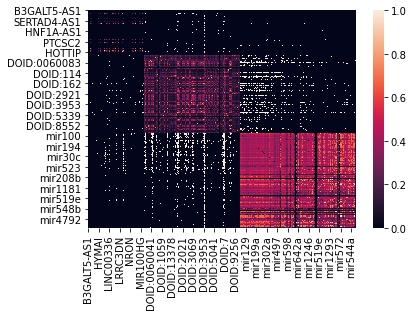

In [13]:
import seaborn as sns
sns.heatmap(csv_file)

In [4]:
edges_idx=set(tuple(sorted(p))  for p in zip(*np.where(csv_file!=0)))

import random
random_edges_idx=random.sample(edges_idx,500)
random_edges_idx=edges_idx

In [14]:
len(edges_idx)

213702

In [6]:
import itertools
node_idx = set(itertools.chain(*random_edges_idx))
len(node_idx)

1074

In [7]:
node_names=csv_file.index

In [8]:
import bisect,functools
category=functools.partial(bisect.bisect_left,[240-1,240+412-1,240+412+495-1])

In [9]:
def calOuterDeg(nodename,category):
    if category==0:
        return csv_file.loc[nodename].sum()-csv_file.loc[nodename].iloc[:240].sum()
    elif category==1:
        return csv_file.loc[nodename].sum()-csv_file.loc[nodename].iloc[240:240+412].sum()
    elif category==2:
        return csv_file.loc[nodename].sum()-csv_file.loc[nodename].iloc[240+412:240+412+495].sum()

In [10]:
nodes=[
    {
        "id":str(idx),
        "name":str(node_names[idx]),
        "category":category(idx),
        "degree":calOuterDeg(node_names[idx],category(idx))
        
    } for idx in node_idx
]
edges=[
    {
        "source": str(edge[0]),
        "target":str(edge[1]),
        "value":float(csv_file.iloc[edge[0],edge[1]]),
        "source_type":category(edge[0]),
        "target_type":category(edge[1])
    } for edge in random_edges_idx
]
import json
with open("nodeLinks.json","w",encoding="utf-8") as f:
    json.dump({
        "nodes":nodes,
        "edges":edges
    },f)


In [12]:
display(max(calOuterDeg(node_names[idx], category(idx)) for idx in node_idx), min(
    calOuterDeg(node_names[idx], category(idx)) for idx in node_idx))


656.0

0.0

In [8]:
# from pyecharts.charts import Graph


# graph=Graph()
# graph.add(series_name="节点链接图",nodes=nodes,links=edges,categories=[{"name":"LncRNA"},{"name":"Disease"},{"name":"miRNA"}],label_opts={"is_show":False})
# graph.render_notebook()


In [9]:
import json
pd.read_json(json.dumps(edges),).to_csv("out.csv",index=False)
pd.read_json(json.dumps(nodes)).to_csv("node_out.csv", index=False, header=["Id", "category"])


In [14]:
csv_file.iloc[:240,:240]

,B3GALT5-AS1,PCA3,LINC01531,HPN-AS1,HULC,TRERNA1,PSORS1C3,ATE1-AS1,NORAD,TP53TG1,...,PARTICL,KCTD21-AS1,PRNCR1,CBR3-AS1,UCA1,XACT,LINC01426,GATA3-AS1,LINC00675,GNG12-AS1
B3GALT5-AS1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PCA3,0.0,0.000000,0.0,0.0,0.417646,0.0,0.091856,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.837550,0.474860,0.0,0.0,0.0,0.0,0.0
LINC01531,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HPN-AS1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HULC,0.0,0.417646,0.0,0.0,0.000000,0.0,0.099006,0.0,0.0,0.0,...,0.0,0.0,0.417646,0.406041,0.737907,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XACT,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
LINC01426,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
GATA3-AS1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
LINC00675,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.manifold import MDS
point_pos=MDS(dissimilarity="precomputed").fit_transform(1-csv_file.iloc[:240,:240])

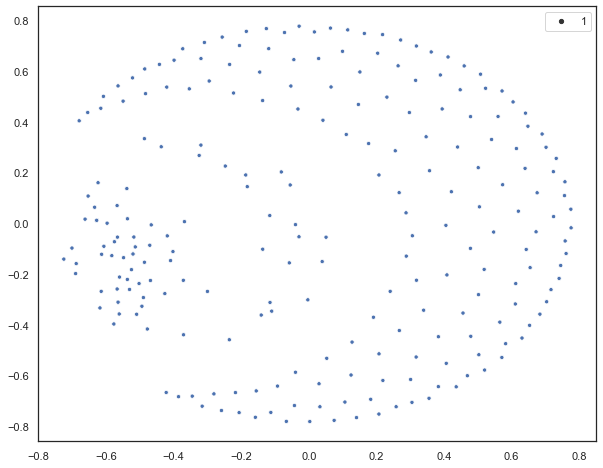

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', rc={'figure.figsize': (10, 8)})
sns.scatterplot(x=point_pos[:, 0], y=point_pos[:, 1],hue=["IncRNA"]*240+["Disease"]*412+["miRNA"]*495,size=1)


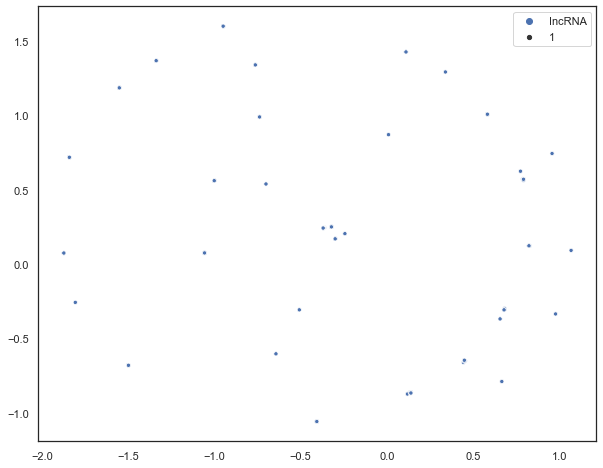

In [28]:
from sklearn.manifold import TSNE
point_pos1=TSNE(metric="precomputed").fit_transform(csv_file.iloc[:240,:240])
sns.scatterplot(x=point_pos1[:, 0], y=point_pos1[:, 1],hue=["IncRNA"]*240,size=1)
csv_file.iloc[:240, :240].to_csv("inc.csv")


In [ ]:
import umap
point_pos2=umap.UMAP()

ModuleNotFoundError: No module named 'numba.experimental.structref'